In [1]:
from data.ReconstructionTrainingDataset import *
import matplotlib.pyplot as plt
from scipy.stats import gamma

In [2]:
engram_dir = '/mnt/smb/locker/abbott-locker/hcnn/'

# Fit a gamma distribution to clean sounds dataset

In [12]:
dset = CleanSoundsDataset(f'{engram_dir}clean_reconstruction_training_set.hdf5')

In [13]:
len(dset)

40050

In [14]:
vals = dset[:200][0]
print(vals.shape)
vals = vals.cpu().numpy().flatten()

torch.Size([200, 164, 400])


In [15]:
fit_alpha, fit_loc, fit_beta = gamma.fit(vals)

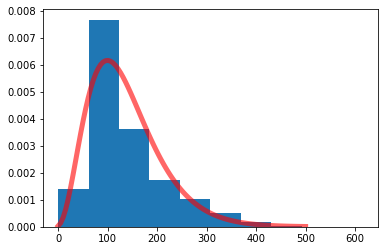

In [16]:
plt.figure()
plt.hist(vals, density=True)
x = np.linspace(0, 500, 100)
y = gamma.pdf(x, fit_alpha, fit_loc, fit_beta)
plt.plot(x, y, 'r', lw=5, alpha=0.6)
plt.show()

In [17]:
print(fit_alpha)
print(fit_loc)
print(fit_beta)

3.8517421681049733
-6.5946826983342355
37.200342178372864


# Generate hdf5 file

In [9]:
num_cgrams = 40050

In [10]:
with h5py.File(f'{engram_dir}gammaNoise_reconstruction_training_set.hdf5', 'x') as f_out:
        label_data_set = f_out.create_dataset("labels",(num_cgrams,), dtype="int32")
        cgram_dataset = f_out.create_dataset("data", (num_cgrams, 164, 400), dtype='float32')

        for ii in range(num_cgrams):
            cgram_dataset[ii] = gamma.rvs(fit_alpha, fit_loc, fit_beta, size=(164, 400))
            label_data_set[ii] = 0

# Test Dataset

In [3]:
dset = GammaNoiseDataset(f'{engram_dir}gammaNoise_reconstruction_training_set.hdf5')

In [4]:
len(dset)

40050

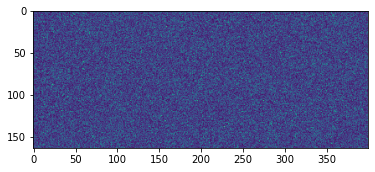

In [6]:
vals = dset[3000][0]
plt.imshow(vals[0])

# Generate stripe hdf5 file

In [18]:
num_cgrams = 40050

In [20]:
with h5py.File(f'{engram_dir}gammaStripeNoise_reconstruction_training_set.hdf5', 'x') as f_out:
        label_data_set = f_out.create_dataset("labels",(num_cgrams,), dtype="int32")
        cgram_dataset = f_out.create_dataset("data", (num_cgrams, 164, 400), dtype='float32')

        for ii in range(num_cgrams):
            cgram = gamma.rvs(fit_alpha, fit_loc, fit_beta, size=(164, 400))
            cgram[:90] = 0
            cgram[100:] = 0
            cgram_dataset[ii] = cgram
            label_data_set[ii] = 0

In [21]:
dset = GammaNoiseDataset(f'{engram_dir}gammaStripeNoise_reconstruction_training_set.hdf5')

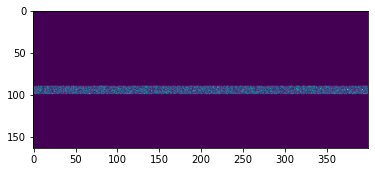

In [22]:
vals = dset[3000][0]
plt.imshow(vals[0])